In [1]:
#import dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import scipy.stats as st
import matplotlib as mpl
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
data_path = "Resources/movies.csv"

movie_df = pd.read_csv(data_path)
movie_df

,imdb_title_id,original_title,year,genre,duration,language,production_company,avg_vote,votes,budget,Good_or_Bad_Movie
0,tt7939428,10 Things We Should Do Before We Break Up,2020,Romance,74,English,NaN,4.7,486,25000000,0
1,tt10740584,Abigail Haunting,2020,Horror,85,English,Indie Film Factory,3.8,398,60000,0
2,tt11032990,Malibu Rescue: The Next Wave,2020,"Action, Adventure, Comedy",68,English,Pacific Bay Entertainment,4.5,386,5000000,0
3,tt8461224,The Tax Collector,2020,"Action, Crime, Drama",95,English,Cedar Park Entertainment,4.7,4862,30000000,0
4,tt11547496,Camp Blood 8: Revelations,2020,Horror,82,English,Sterling Entertainment,2.2,114,10000,0
...,...,...,...,...,...,...,...,...,...,...,...
10340,tt0004465,The Perils of Pauline,1914,"Action, Adventure, Drama",199,English,PathÃ© FrÃ¨res,6.3,939,25000,0
10341,tt0004181,Judith of Bethulia,1914,Drama,61,English,Biograph Company,6.1,1239,40000,0
10342,tt0004099,"His Majesty, the Scarecrow of Oz",1914,"Family, Fantasy, Adventure",59,English,The Oz Film Manufacturing Company,5.2,415,23500,0
10343,tt0003471,Traffic in Souls,1913,"Crime, Drama",88,English,Independent Moving Pictures Co. of America (IMP),6.0,552,5700,0


In [7]:
movie_df["genre"]= movie_df["genre"].str.split(',', expand=True)
movie_df

,imdb_title_id,original_title,year,genre,duration,language,production_company,avg_vote,votes,budget,Good_or_Bad_Movie
0,tt7939428,10 Things We Should Do Before We Break Up,2020,Romance,74,English,NaN,4.7,486,25000000,0
1,tt10740584,Abigail Haunting,2020,Horror,85,English,Indie Film Factory,3.8,398,60000,0
2,tt11032990,Malibu Rescue: The Next Wave,2020,Action,68,English,Pacific Bay Entertainment,4.5,386,5000000,0
3,tt8461224,The Tax Collector,2020,Action,95,English,Cedar Park Entertainment,4.7,4862,30000000,0
4,tt11547496,Camp Blood 8: Revelations,2020,Horror,82,English,Sterling Entertainment,2.2,114,10000,0
...,...,...,...,...,...,...,...,...,...,...,...
10340,tt0004465,The Perils of Pauline,1914,Action,199,English,PathÃ© FrÃ¨res,6.3,939,25000,0
10341,tt0004181,Judith of Bethulia,1914,Drama,61,English,Biograph Company,6.1,1239,40000,0
10342,tt0004099,"His Majesty, the Scarecrow of Oz",1914,Family,59,English,The Oz Film Manufacturing Company,5.2,415,23500,0
10343,tt0003471,Traffic in Souls,1913,Crime,88,English,Independent Moving Pictures Co. of America (IMP),6.0,552,5700,0


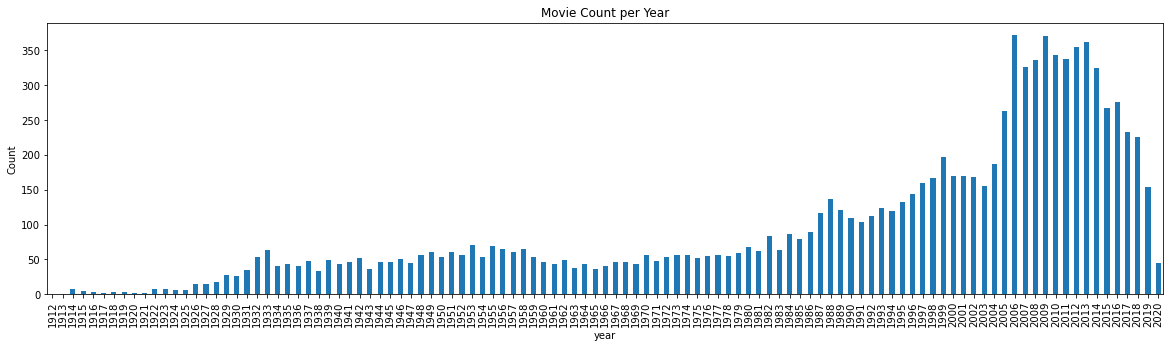

In [11]:
year_gb = movie_df.groupby(["year"])
movie_count = year_gb.count()["original_title"]
movie_count_chart= movie_count.plot(kind= "bar", figsize=(20,5))
plt.title("Movie Count per Year")
movie_count_chart.set_ylabel("Count")
plt.show()

In [16]:
good_movies_per_year = year_gb.sum()["Good_or_Bad_Movie"]
good_movies_per_year

year
1912     0
1913     0
1914     0
1915     0
1916     1
        ..
2016    27
2017    27
2018    36
2019    24
2020     2
Name: Good_or_Bad_Movie, Length: 109, dtype: int64

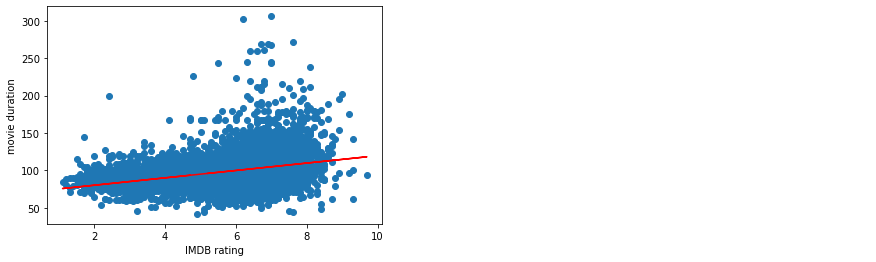

In [32]:
IMDB =movie_df["avg_vote"]
duration = movie_df["duration"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(IMDB, duration)
regress_values = IMDB * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(IMDB, duration)

plt.plot(IMDB,regress_values,"r-")
plt.annotate(line_eq,(20,100),fontsize=15,color="red")
plt.xlabel('IMDB rating')
plt.ylabel('movie duration')
plt.show()

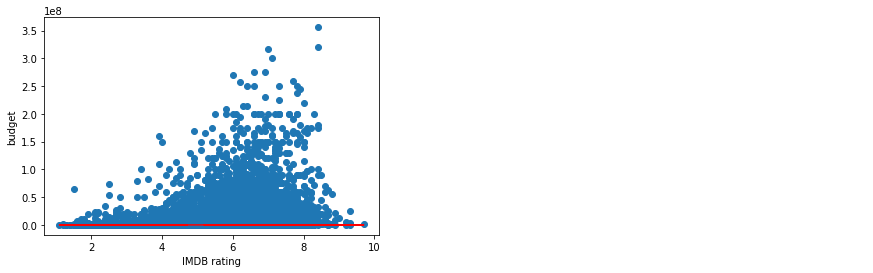

In [33]:
IMDB =movie_df["avg_vote"]
budget = movie_df["budget"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(IMDB, duration)
regress_values = IMDB * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(IMDB, budget)

plt.plot(IMDB,regress_values,"r-")
plt.annotate(line_eq,(20,100),fontsize=15,color="red")
plt.xlabel('IMDB rating')
plt.ylabel('budget')
plt.show()